# Heisenberg uncertainty principle

## General Heisenberg uncertainty principle

Let us consider two observables, A and B. Let $\langle A \rangle$ be the expectation value of A in a given normalized state $|\psi\rangle$. We define the uncertainty of A as:
$$ \Delta A=\langle (A - \langle A \rangle )^2 \rangle ^{1/2}=
( \langle A^2 \rangle - \langle A \rangle^2 ) ^{1/2}.$$
Similarly, we can define the expectation value of B and its uncertainty. It can be shown that
$$\Delta A \Delta B \geq \frac{1}{2} |\langle [A,B] \rangle|. $$
This is the general Heisenberg uncertainty relation, where $[A,B]=AB-BA$ is the commutator of A and B.  

## Uncertainty relation for $\sigma_X$ and $\sigma_Y $

Three quantum logic gates X,Y,Z correspond to three  Pauli matrices $\sigma_X$,$\sigma_Y$,$\sigma_Z$ respectively, where $X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}$,$Y=\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}$,$Z=\begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}$. Since $[\sigma_X,\sigma_Y]=2i\sigma_Z$, according to the uncertainty principle, there should be $\Delta X \Delta Y \geq \ |\langle Z \rangle |. $  
More specifically, if the quantum state is set as $|\psi \rangle=cos \frac{\theta}{2}|0 \rangle + e^{i\phi}sin\frac{\theta}{2}|1 \rangle $, then it can be calculated that 
$$ \langle \psi |X| \psi \rangle = sin \theta cos \phi, \langle \psi |Y| \psi \rangle = sin \theta sin \phi, \langle \psi |Z| \psi \rangle = cos \theta , \langle \psi |X^2| \psi \rangle = \langle \psi |Y^2| \psi \rangle = 1,$$
$$ [ \Delta (X) \Delta (Y) ]^2-| \langle Z \rangle|^2=(1-{sin}^2 \theta {cos}^2 \phi)(1- {sin}^2 \theta {sin}^2 \phi)-{cos}^2 \theta={cos}^2 \phi {sin}^2 \phi {sin}^4 \theta \geq 0. $$
The above formula is the equivalent expression of the uncertainty principle of X and Y operators, and we will  demonstrate it by pyquafu below.

## Building the circuit

First we define a function to build a 3-qubit circuit, which changes every qubit from $|0\rangle$ to $|\psi\rangle=cos \frac{\theta}{2}|0\rangle + e^{i\phi}sin\frac{\theta}{2}|1\rangle $. To simplify the problem, we fixed $\phi$ as $\frac{\pi}{4}$ and $\theta$ as variable.

In [1]:
from quafu import QuantumCircuit, simulate, Task
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin

def create_state(theta ,phi = pi/4 ):
    qc = QuantumCircuit(3)
    for i in range(3):
        qc.ry(i, theta)
        qc.rz(i, phi)
    return qc

Then we define the main function for demonstration. It has two parameters, `theta_num` is used to determine the number of theta values, `experimental` is used to select the operation on real machine or simulator. The function will take `theta_num` theta values uniformly in the interval $[0,\pi)$ for measurement, and place the measured expected $E(X)$,$E(Y)$ and $E(Z)$ in `obsexp`.  
The function has three return parameters, `theta`, `obsexp`, `experimental`, which respectively represent the taken theta value, corresponding three expectations and whether it is running on real machine or simulator. Besides, if running on a real machine, the function will show the history of the task, and you can save it for later viewing.

In [2]:
def uncertainty_principle_demo(theta_num = 10, experimental: bool = False):
    theta_step=pi/theta_num  
    theta=[]  # to save the value of theta
    obsexp=[]  # to save the value of EX,EY,EZ
    name=["θ={:.3f}*pi".format(i*theta_step/pi)  for i in range(theta_num)]  # name of each task
    groupname="uncertainty_principle"  # name of group
    task = Task()  # create and configure task
    task.config(backend="ScQ-P18", shots=2000, compile=True) # backend can be "ScQ-P10", "ScQ-P18", "ScQ-P136"
    for i in range(theta_num):
        theta_i = i*theta_step
        qc = create_state(theta = theta_i)
        qc.ry(0, -np.pi / 2)   # change measure bases to the eigenstates of X
        qc.rx(1, np.pi / 2)   # change measure bases to the eigenstates of Y
        sub_obsexp=[] # to save the value of EX,EY,EZ in this loop
        #qc.draw_circuit(width=5)
        if experimental:
            print("θ={:.3f}*pi, sending task...".format(theta_i/pi))
            sub_res = task.send(qc, name=name[i], group=groupname)
            for i in range(3):
                sub_obsexp.append(sub_res.calculate_obs([i]))
            print(f'theta ={theta_i}, E(X) ={sub_obsexp[0]}, E(Y) ={sub_obsexp[1]}, E(Z)={sub_obsexp[2]}')
        else:
            simu_res = simulate(qc)
            for i in range(3):
                sub_obsexp.append(simu_res.calculate_obs([i]))
        theta.append(theta_i)
        obsexp.append(sub_obsexp)
    if experimental:
        history=task.get_history()
        print(history)  #save the history to disk if you want to retrieve it next time
    return theta,obsexp,experimental

## Show the result

To show the theoretical curve, we take 100 theta values uniformly in the interval $[0,\pi)$ and calculate its theoretical value.

In [3]:
def Theoretical_value(theta, phi=pi/4):
    return (sin(phi)**2)*(cos(phi)**2)*(sin(theta)**4)  # (Δ(X)Δ(Y))^2-|<Z>|^2
x = np.linspace(0, pi, 100)
y = Theoretical_value(x)

In [4]:
def Plot_theoretical_value(x,y):
    plt.plot(x, y, label="Theoretical value: sin(φ)^2*cos(φ)^2*sin(θ)^4")
    plt.xlabel("theta")
    plt.ylabel("(Δ(X)Δ(Y))^2-|<Z>|^2")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

### Simulation result

By calling the uncertainty_principle_demo function and setting the `experimental` parameter to False, we can get results operating on the simulator, which can then be visualized with the method in matplotlib.

θ=0.000*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.000000
θ=0.100*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.002280
θ=0.200*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.029841
θ=0.300*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.107095
θ=0.400*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.204534
θ=0.500*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.250000
θ=0.600*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.204534
θ=0.700*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.107095
θ=0.800*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.029841
θ=0.900*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.002280


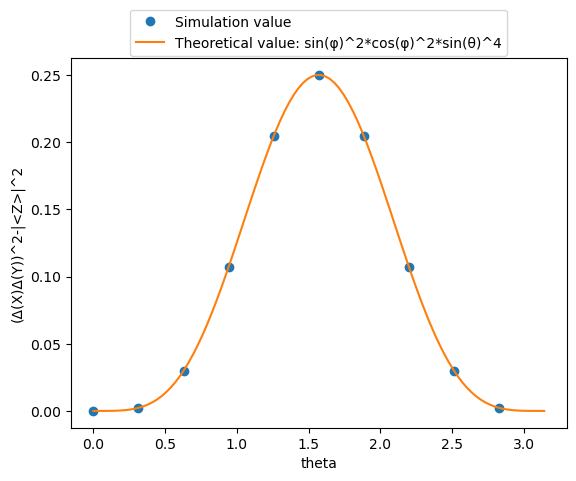

In [5]:
theta, obsexp, experimental = uncertainty_principle_demo(theta_num = 10, experimental = False)
res=[(1-obsexp[i][0]**2)*(1-obsexp[i][1]**2)-obsexp[i][2]**2 for i in range(len(obsexp))]  #(Δ(X)Δ(Y))^2-|<Z>|^2
for i in range(len(res)):
    print("θ={:.3f}*pi".format(theta[i]/pi),"(Δ(X)Δ(Y))^2-|<Z>|^2={:.6f}".format(res[i]))  #show the result data
# show the result graph
plt.plot(theta, res, "o",label="Simulation value")
Plot_theoretical_value(x,y)
plt.show()

### Experimental result

By setting the `experimental` parameter to True, we can get results running on the real machine. And the history of the task will be shown.

θ=0.000*pi, sending task...
theta =0.0, E(X) =-0.19399999999999995, E(Y) =-0.09699999999999998, E(Z)=0.998
θ=0.100*pi, sending task...
theta =0.3141592653589793, E(X) =0.20339830084957522, E(Y) =0.17341329335332328, E(Z)=0.950024987506247
θ=0.200*pi, sending task...
theta =0.6283185307179586, E(X) =0.373, E(Y) =0.393, E(Z)=0.7969999999999999
θ=0.300*pi, sending task...
theta =0.9424777960769379, E(X) =0.514, E(Y) =0.558, E(Z)=0.603
θ=0.400*pi, sending task...
theta =1.2566370614359172, E(X) =0.633, E(Y) =0.643, E(Z)=0.336
θ=0.500*pi, sending task...
theta =1.5707963267948966, E(X) =0.6539999999999999, E(Y) =0.7350000000000001, E(Z)=-0.03899999999999998
θ=0.600*pi, sending task...
theta =1.8849555921538759, E(X) =0.629, E(Y) =0.6539999999999999, E(Z)=-0.332
θ=0.700*pi, sending task...
theta =2.199114857512855, E(X) =0.47100000000000003, E(Y) =0.5840000000000001, E(Z)=-0.5680000000000001
θ=0.800*pi, sending task...
theta =2.5132741228718345, E(X) =0.28200000000000003, E(Y) =0.41700000000

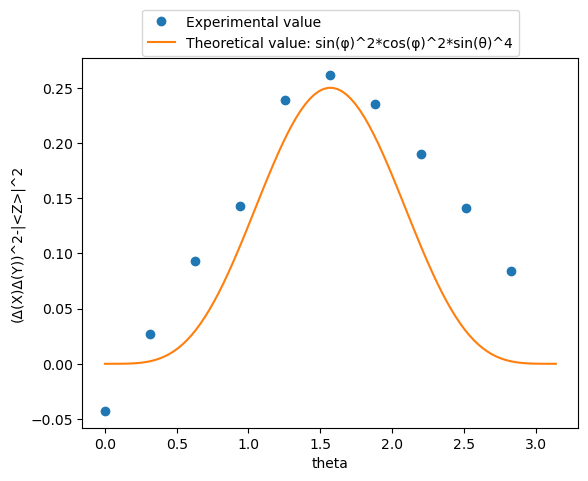

In [6]:
theta, obsexp, experimental = uncertainty_principle_demo(theta_num = 10, experimental = True)
res=[(1-obsexp[i][0]**2)*(1-obsexp[i][1]**2)-obsexp[i][2]**2 for i in range(len(obsexp))]  #(Δ(X)Δ(Y))^2-|<Z>|^2
for i in range(len(res)):
    print("θ={:.3f}*pi".format(theta[i]/pi),"(Δ(X)Δ(Y))^2-|<Z>|^2={:.6f}".format(res[i]))  #show the result data
# show the result graph
plt.plot(theta, res, "o",label="Experimental value")
Plot_theoretical_value(x,y)
plt.show()

### Retrieve tasks

If you have saved the id of the tasks running on the real machine, you can retrieve the results in the following way.

Group:  uncertainty_principle
task_id              task_name      status    
2633EA50181CBEA7     θ=0.000*pi     Completed 
2633EAD038B2F038     θ=0.100*pi     Completed 
2633EB50180907CA     θ=0.200*pi     Completed 
2633EBC0341CB6A8     θ=0.300*pi     Completed 
2633EC4012DB7BEC     θ=0.400*pi     Completed 
2633ECB02D0EF14D     θ=0.500*pi     Completed 
2633ED300D0269F1     θ=0.600*pi     Completed 
2633EDB027E88D7E     θ=0.700*pi     Completed 
2633EE30007084B3     θ=0.800*pi     Completed 
2633EEA01A79C945     θ=0.900*pi     Completed 
θ=0.000*pi (Δ(X)Δ(Y))^2-|<Z>|^2=-0.042695
θ=0.100*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.027254
θ=0.200*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.092701
θ=0.300*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.143092
θ=0.400*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.238630
θ=0.500*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.261601
θ=0.600*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.235641
θ=0.700*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.190139
θ=0.800*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.141046
θ=0.900*pi (Δ(X)Δ(Y))^2-|<Z>|^2=0.084034


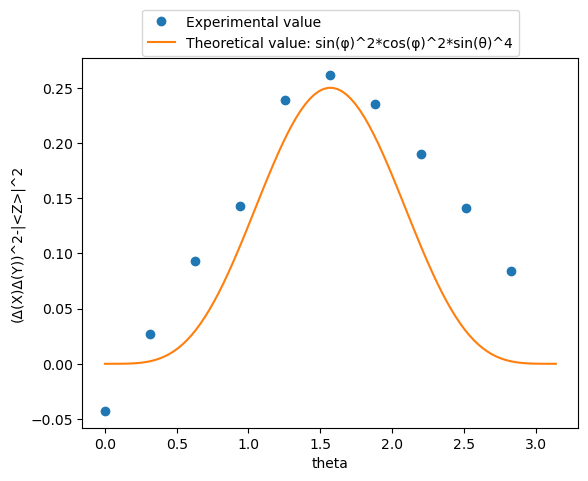

In [7]:
# Copy the history you want to retrieve into old_history. The type of the old_history is dictionary and the form is: {'group_name': ['taskid']}.
old_history={'uncertainty_principle': ['2633EA50181CBEA7', '2633EAD038B2F038', '2633EB50180907CA', '2633EBC0341CB6A8',
'2633EC4012DB7BEC', '2633ECB02D0EF14D', '2633ED300D0269F1', '2633EDB027E88D7E', '2633EE30007084B3', '2633EEA01A79C945']}
newtask = Task()
result = newtask.retrieve_group("uncertainty_principle", history=old_history)
obsexp=[]
for i in range(len(result)):
    obsexp.append([])
    for j in range(3):
        obsexp[i].append(result[i].calculate_obs([j]))
theta = [ i*pi/len(obsexp) for i in range(len(obsexp))]


res=[(1-obsexp[i][0]**2)*(1-obsexp[i][1]**2)-obsexp[i][2]**2 for i in range(len(obsexp))]  #(Δ(X)Δ(Y))^2-|<Z>|^2
for i in range(len(res)):
    print("θ={:.3f}*pi".format(theta[i]/pi),"(Δ(X)Δ(Y))^2-|<Z>|^2={:.6f}".format(res[i]))  #show the result data
# show the result graph
plt.plot(theta, res, "o",label="Experimental value")
Plot_theoretical_value(x,y)
plt.show()